<a href="https://colab.research.google.com/github/VitorBrunor/Classificacao-De-Roupas/blob/main/ClassificacaoRoupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Vamos importar bibliotecas

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


## Importe a base de dados Fashion MNIST

Usamos a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST tem como intenção substituir a clássica base de dados [MNIST](http://yann.lecun.com/exdb/mnist/ )— frequentemente usada como "Hello, World" de programas de aprendizado de máquina (*machine learning*) para visão computacional. A base de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de roupas que usaremos aqui.

Usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. Você pode acessar a Fashion MNIST diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist # A base de dados é interna, logo podemos acessar ela diretamente dfo keras

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Carregando a base de dados que retorna quatro NumPy arrays:

* Os *arrays* `train_images` e `train_labels`  são o *conjunto de treinamento*— os dados do modelo usados para aprender.
* O modelo é testado com o *conjunto de teste*, os *arrays* `test_images` e `test_labels`.

As imagens são arrays  NumPy de 28x28, com os valores de pixels entre 0 to 255. As *labels* (alvo da classificação) são um  array  de inteiros, no intervalo de  0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem é mapeada com um só label. Já que o *nome das classes* não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [ ]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens :

In [ ]:
len(test_labels)

10000

## Pré-processando os dados

Vamos pré-processar os dados para sermos capazes de usar eles no treinamento. vamos "decompor a imagem" em pixels entre 0 e 255.
Importante salientar que esssa imagem faz parte do conjunto de treinamento de dados.

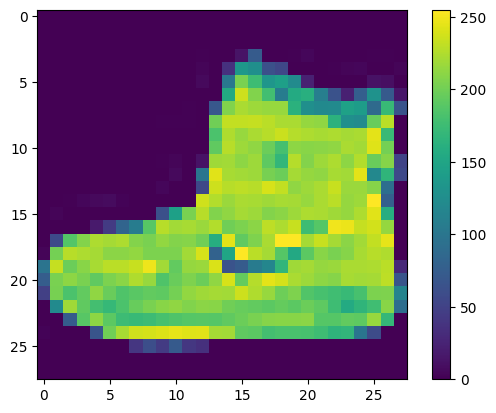

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem abaixo.

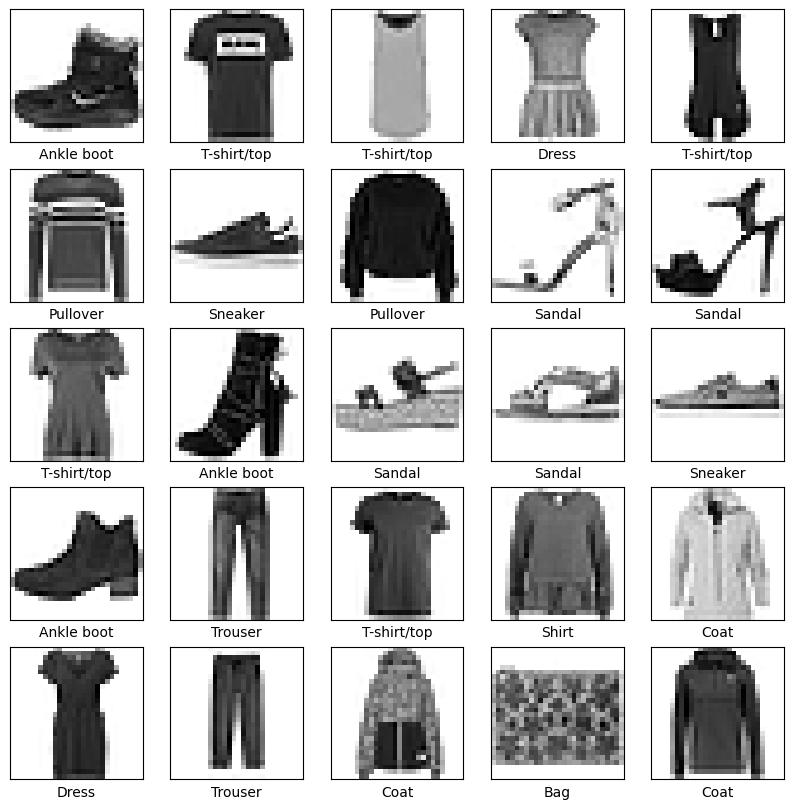

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

### Montando as camadas

O principal bloco de construção da rede neural é a camada (*layer*). As camadas (*layers*) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do *deep learning* consiste em encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem parâmetros que são aprendidos durante o treinamento.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os enfilere. Essa camada não tem parâmetros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`. Essas são camadas neurais *densely connected*, ou *fully connected*. A primeira camada `Dense` tem 512 nós (ou neurônios). A segunda (e última) camada é uma *softmax*  de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

### Compilando o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de *compilação*:

* *Função Loss* —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para *guiar* o modelo para a direção certa.
* *Optimizer* —Isso é como o modelo se atualiza com base no dado que ele vê e sua função *loss*.
* *Métricas* —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinando o modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
2. O modelo aprende como associar as imagens as *labels*.
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as *labels*  do array `test_labels`.

Para começar a treinar, chame o método `model.fit`— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [ ]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 16s 8ms/step - loss: 4.0231 - accuracy: 0.7637
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5400 - accuracy: 0.8205
Epoch 3/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5104 - accuracy: 0.8267
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4881 - accuracy: 0.8358
Epoch 5/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4871 - accuracy: 0.8364
Epoch 6/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4728 - accuracy: 0.8421
Epoch 7/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4663 - accuracy: 0.8424
Epoch 8/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4564 - accuracy: 0.8461
Epoch 9/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4542 - accuracy: 0.8454
Epoch 10/100
1875/1875 [==============================] - 15s 8m

À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento.

## Avaliando a acurácia
Comparamos como o modelo performou com o conjunto de teste:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.7957 - accuracy: 0.8119 - 911ms/epoch - 3ms/step

Test accuracy: 0.8119000196456909


## Predições

Com o modelo treinado, o usaremos para predições de algumas imagens.

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


Aqui, o modelo previu que a *label* de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [ ]:
predictions[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.68532892e-05, 0.00000000e+00, 1.51652265e-02,
       0.00000000e+00, 9.84797895e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a *confiança* do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada *label*  tem um maior valor de confiança:

In [ ]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou `class_names[9]`. Examinando a label do teste, vemos que essa classificação é correta:

In [ ]:
test_labels[0]

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição.

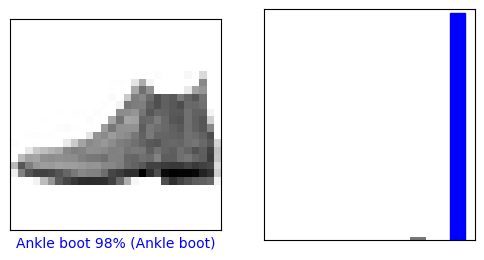

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

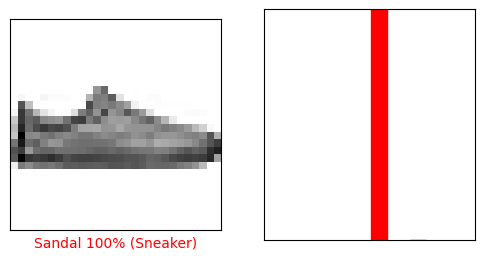

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estando confiante.

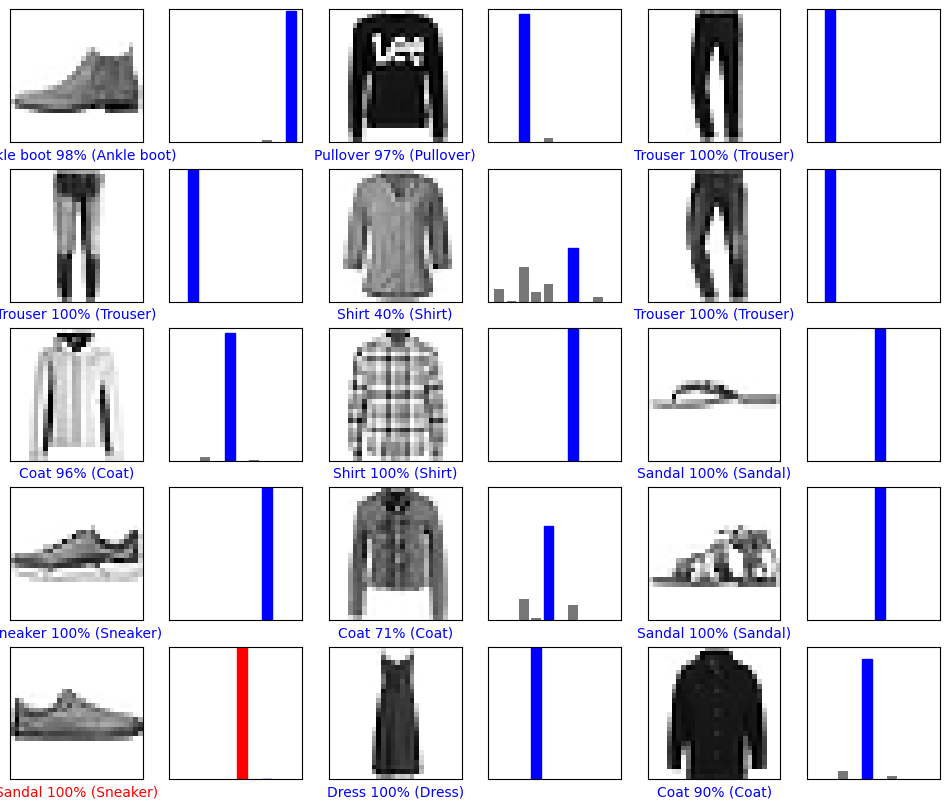

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()